In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

import sys

sys.path.append('../../')
from Dynearthsol import Dynearthsol

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [12]:
MODEL_NAMES = [
    "vel_weakening/result"
]
# Function to read time steps and times from the info file
def read_time_steps(filename):
    data = np.loadtxt(filename, usecols=(0, 2))
    time_steps = data[:, 0].astype(int)
    times = data[:, 1]
    return time_steps, times

# Function to find the closest node
def find_closest_node(coordinates, target_x, target_depth):
    distances = np.sqrt((coordinates[:, 0] - target_x) ** 2 + (coordinates[:, 1] - target_depth) ** 2)
    return np.argmin(distances)  # Return index of closest node

# Function to perform numerical calculations for each time step
def numerical(num_steps, model_name):
    des = Dynearthsol(model_name)
    
    # Storage for displacement and velocity at the closest node
    disp_4km = np.zeros([num_steps, 2], dtype=float)
    vel_4km = np.zeros([num_steps, 2], dtype=float)

    # Read initial coordinates to find closest nodes once
    coordinates0 = des.read_field(0, 'coord0')  # Initial coordinates
    node_4km = find_closest_node(coordinates0, target_x=50000, target_depth=-4050)

    for time_step in range(num_steps):
        coordinates = des.read_field(time_step, 'coordinate')  # Current coordinates
        vel = des.read_field(time_step, 'velocity')  # Velocity field
        disp = coordinates - coordinates0  # Displacement calculation

        # Store values for the closest node
        disp_4km[time_step, :] = disp[node_4km]
        vel_4km[time_step, :] = vel[node_4km]

    return disp_4km, vel_4km

# Read time steps and numerical times from the info file of one of the models
time_steps, times = read_time_steps(MODEL_NAMES[0] + '.info')
times = times / 86400 / 365.25  # Convert seconds to years
num_steps = len(time_steps)

# Run numerical analysis
results = [numerical(num_steps, model_name) for model_name in MODEL_NAMES]
disp_4km, vel_4km = [np.squeeze(np.array(arr)) for arr in zip(*results)]

# Compute magnitude of displacement and velocity
disp_4km_mag = np.linalg.norm(disp_4km, axis=1)
vel_4km_mag = np.linalg.norm(vel_4km, axis=1)



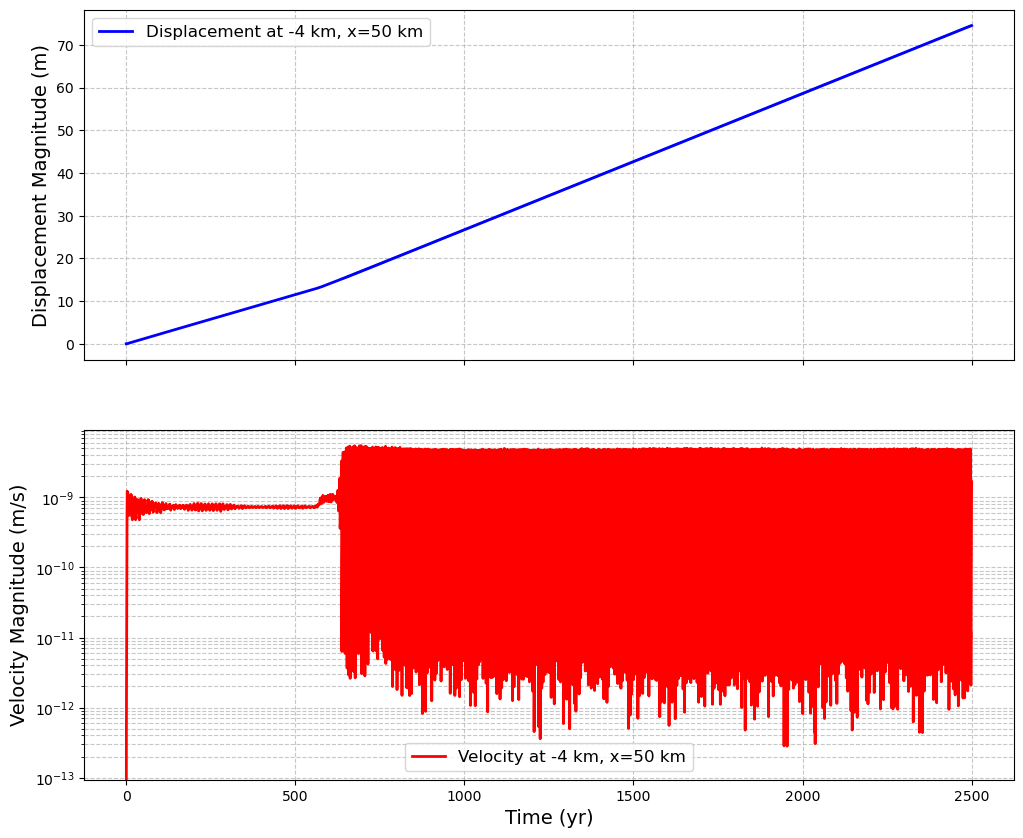

In [13]:

# Define the time window for zooming (in years)
start_time = 2953.335  # Example: Start zoom at 2953.335 years
end_time = 2953.338    # Example: End zoom at 2953.338 years

# Create a figure with two subplots (panels)
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot displacement magnitudes (linear scale)
axes[0].plot(times, disp_4km_mag, label='Displacement at -4 km, x=50 km', color='b', linestyle='-', linewidth=2)
axes[0].set_ylabel('Displacement Magnitude (m)', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# axes[0].axvspan(start_time, end_time, color='gray', alpha=0.3, label='Zoomed Region')  # Highlight zoom window

# # Create an inset zoomed plot for displacement
# axins_disp = inset_axes(axes[0], width="45%", height="45%", loc="upper right")
# axins_disp.plot(times, disp_4km_mag, color='b', linestyle='-', linewidth=2)
# axins_disp.set_xlim(start_time, end_time)  # Zoomed x-axis range
# axins_disp.set_title("Zoomed View", fontsize=12)
# axins_disp.grid(True, linestyle='--', alpha=0.7, which='both')
# axins_disp.set_ylim(85, 86.5)  # **Fixed y-axis range**
# # Draw a connection between the main plot and the zoomed inset
# mark_inset(axes[0], axins_disp, loc1=2, loc2=4, fc="none", ec="black", lw=1)

# Plot velocity magnitudes (logarithmic scale)
axes[1].plot(times, vel_4km_mag, label='Velocity at -4 km, x=50 km', color='r', linestyle='-', linewidth=2)
axes[1].set_yscale('log')  # Set logarithmic scale for velocity
axes[1].set_xlabel('Time (yr)', fontsize=14)
axes[1].set_ylabel('Velocity Magnitude (m/s)', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7, which='both')
# axes[1].set_xlim(1000, 1100)  # **Fixed y-axis range**
# axes[1].set_ylim(1e-10, 1e-8)  # **Fixed y-axis range**
# axes[1].set_ylim(1e-14, 1e-0)  # **Fixed y-axis range**
# axes[1].axvspan(start_time-10, end_time+10, color='yellow', label='Zoomed Region')  # Highlight zoom window

# # Create an inset zoomed plot for velocity
# axins_vel = inset_axes(axes[1], width="45%", height="45%", loc="upper right")
# axins_vel.plot(times, vel_4km_mag, color='r', linestyle='-', linewidth=2)
# axins_vel.set_yscale('log')  # Keep log scale for velocity
# axins_vel.set_xlim(start_time, end_time)  # Zoomed x-axis range
# axins_vel.set_title("Zoomed View", fontsize=12)
# axins_vel.grid(True, linestyle='--', alpha=0.7, which='both')

# # Draw a connection between the main plot and the zoomed inset
# mark_inset(axes[1], axins_vel, loc1=2, loc2=4, fc="none", ec="black", lw=1)

# # Improve aesthetics
# for ax in axes:
#     ax.tick_params(axis='both', labelsize=12)
#     ax.spines['top'].set_linewidth(2.5)
#     ax.spines['right'].set_linewidth(2.5)
#     ax.spines['left'].set_linewidth(2.5)
#     ax.spines['bottom'].set_linewidth(2.5)

# plt.tight_layout()
# plt.show()


In [ ]:
MODEL_NAMES = [
    "vel_neutral/result"
]
# Function to read time steps and times from the info file
def read_time_steps(filename):
    data = np.loadtxt(filename, usecols=(0, 2))
    time_steps = data[:, 0].astype(int)
    times = data[:, 1]
    return time_steps, times

# Function to find the closest node
def find_closest_node(coordinates, target_x, target_depth):
    distances = np.sqrt((coordinates[:, 0] - target_x) ** 2 + (coordinates[:, 1] - target_depth) ** 2)
    return np.argmin(distances)  # Return index of closest node

# Function to perform numerical calculations for each time step
def numerical(num_steps, model_name):
    des = Dynearthsol(model_name)
    
    # Storage for displacement and velocity at the closest node
    disp_4km = np.zeros([num_steps, 2], dtype=float)
    vel_4km = np.zeros([num_steps, 2], dtype=float)

    # Read initial coordinates to find closest nodes once
    coordinates0 = des.read_field(0, 'coord0')  # Initial coordinates
    node_4km = find_closest_node(coordinates0, target_x=50000, target_depth=-4050)

    for time_step in range(num_steps):
        coordinates = des.read_field(time_step, 'coordinate')  # Current coordinates
        vel = des.read_field(time_step, 'velocity')  # Velocity field
        disp = coordinates - coordinates0  # Displacement calculation

        # Store values for the closest node
        disp_4km[time_step, :] = disp[node_4km]
        vel_4km[time_step, :] = vel[node_4km]

    return disp_4km, vel_4km

# Read time steps and numerical times from the info file of one of the models
time_steps, times = read_time_steps(MODEL_NAMES[0] + '.info')
times = times / 86400 / 365.25  # Convert seconds to years
num_steps = len(time_steps)

# Run numerical analysis
results = [numerical(num_steps, model_name) for model_name in MODEL_NAMES]
disp_4km, vel_4km = [np.squeeze(np.array(arr)) for arr in zip(*results)]

# Compute magnitude of displacement and velocity
disp_4km_mag = np.linalg.norm(disp_4km, axis=1)
vel_4km_mag = np.linalg.norm(vel_4km, axis=1)



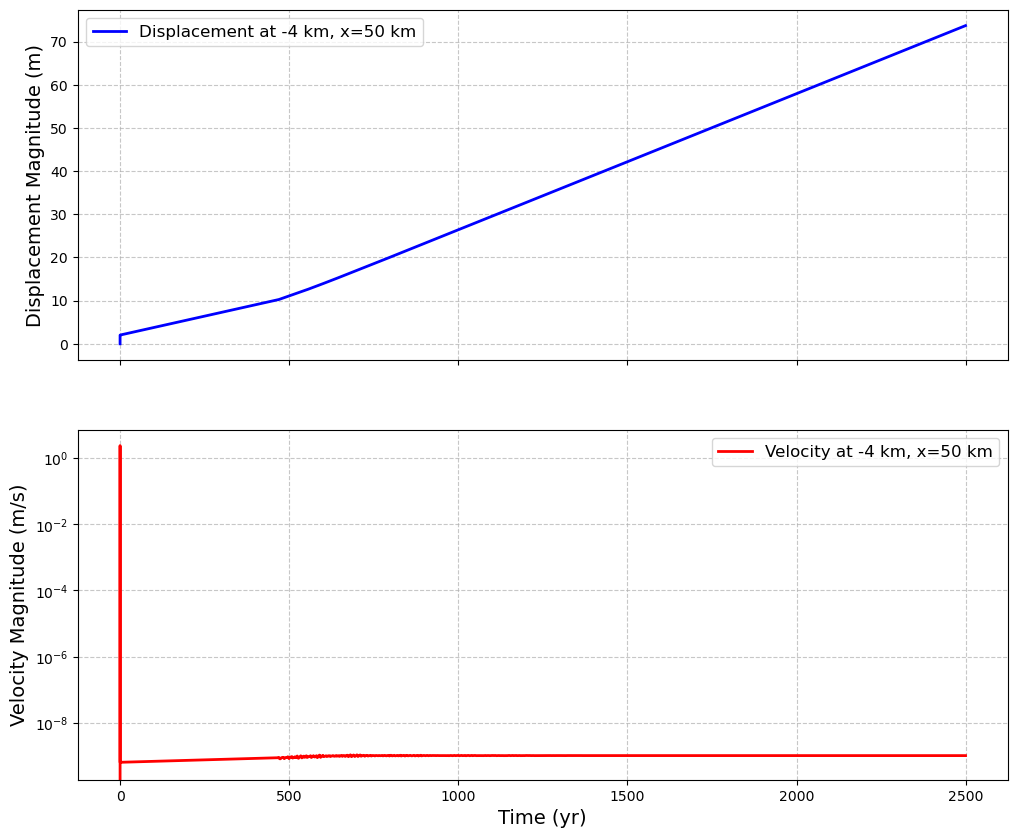

In [20]:

# Define the time window for zooming (in years)
start_time = 2953.335  # Example: Start zoom at 2953.335 years
end_time = 2953.338    # Example: End zoom at 2953.338 years

# Create a figure with two subplots (panels)
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot displacement magnitudes (linear scale)
axes[0].plot(times, disp_4km_mag, label='Displacement at -4 km, x=50 km', color='b', linestyle='-', linewidth=2)
axes[0].set_ylabel('Displacement Magnitude (m)', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# axes[0].axvspan(start_time, end_time, color='gray', alpha=0.3, label='Zoomed Region')  # Highlight zoom window

# # Create an inset zoomed plot for displacement
# axins_disp = inset_axes(axes[0], width="45%", height="45%", loc="upper right")
# axins_disp.plot(times, disp_4km_mag, color='b', linestyle='-', linewidth=2)
# axins_disp.set_xlim(start_time, end_time)  # Zoomed x-axis range
# axins_disp.set_title("Zoomed View", fontsize=12)
# axins_disp.grid(True, linestyle='--', alpha=0.7, which='both')
# axins_disp.set_ylim(85, 86.5)  # **Fixed y-axis range**
# # Draw a connection between the main plot and the zoomed inset
# mark_inset(axes[0], axins_disp, loc1=2, loc2=4, fc="none", ec="black", lw=1)

# Plot velocity magnitudes (logarithmic scale)
axes[1].plot(times, vel_4km_mag, label='Velocity at -4 km, x=50 km', color='r', linestyle='-', linewidth=2)
axes[1].set_yscale('log')  # Set logarithmic scale for velocity
axes[1].set_xlabel('Time (yr)', fontsize=14)
axes[1].set_ylabel('Velocity Magnitude (m/s)', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7, which='both')
# axes[1].set_ylim(1e-10, 1e-8)  # **Fixed y-axis range**
# axes[1].set_ylim(1e-14, 1e-0)  # **Fixed y-axis range**
# axes[1].axvspan(start_time-10, end_time+10, color='yellow', label='Zoomed Region')  # Highlight zoom window

# # Create an inset zoomed plot for velocity
# axins_vel = inset_axes(axes[1], width="45%", height="45%", loc="upper right")
# axins_vel.plot(times, vel_4km_mag, color='r', linestyle='-', linewidth=2)
# axins_vel.set_yscale('log')  # Keep log scale for velocity
# axins_vel.set_xlim(start_time, end_time)  # Zoomed x-axis range
# axins_vel.set_title("Zoomed View", fontsize=12)
# axins_vel.grid(True, linestyle='--', alpha=0.7, which='both')

# # Draw a connection between the main plot and the zoomed inset
# mark_inset(axes[1], axins_vel, loc1=2, loc2=4, fc="none", ec="black", lw=1)

# # Improve aesthetics
# for ax in axes:
#     ax.tick_params(axis='both', labelsize=12)
#     ax.spines['top'].set_linewidth(2.5)
#     ax.spines['right'].set_linewidth(2.5)
#     ax.spines['left'].set_linewidth(2.5)
#     ax.spines['bottom'].set_linewidth(2.5)

# plt.tight_layout()
# plt.show()


In [ ]:
MODEL_NAMES = [
    "vel_strengthening/result"
]
# Function to read time steps and times from the info file
def read_time_steps(filename):
    data = np.loadtxt(filename, usecols=(0, 2))
    time_steps = data[:, 0].astype(int)
    times = data[:, 1]
    return time_steps, times

# Function to find the closest node
def find_closest_node(coordinates, target_x, target_depth):
    distances = np.sqrt((coordinates[:, 0] - target_x) ** 2 + (coordinates[:, 1] - target_depth) ** 2)
    return np.argmin(distances)  # Return index of closest node

# Function to perform numerical calculations for each time step
def numerical(num_steps, model_name):
    des = Dynearthsol(model_name)
    
    # Storage for displacement and velocity at the closest node
    disp_4km = np.zeros([num_steps, 2], dtype=float)
    vel_4km = np.zeros([num_steps, 2], dtype=float)

    # Read initial coordinates to find closest nodes once
    coordinates0 = des.read_field(0, 'coord0')  # Initial coordinates
    node_4km = find_closest_node(coordinates0, target_x=50000, target_depth=-4050)

    for time_step in range(num_steps):
        coordinates = des.read_field(time_step, 'coordinate')  # Current coordinates
        vel = des.read_field(time_step, 'velocity')  # Velocity field
        disp = coordinates - coordinates0  # Displacement calculation

        # Store values for the closest node
        disp_4km[time_step, :] = disp[node_4km]
        vel_4km[time_step, :] = vel[node_4km]

    return disp_4km, vel_4km

# Read time steps and numerical times from the info file of one of the models
time_steps, times = read_time_steps(MODEL_NAMES[0] + '.info')
times = times / 86400 / 365.25  # Convert seconds to years
num_steps = len(time_steps)

# Run numerical analysis
results = [numerical(num_steps, model_name) for model_name in MODEL_NAMES]
disp_4km, vel_4km = [np.squeeze(np.array(arr)) for arr in zip(*results)]

# Compute magnitude of displacement and velocity
disp_4km_mag = np.linalg.norm(disp_4km, axis=1)
vel_4km_mag = np.linalg.norm(vel_4km, axis=1)



FileNotFoundError: vel_strengthening/result.info not found.

(1000.0, 1100.0)

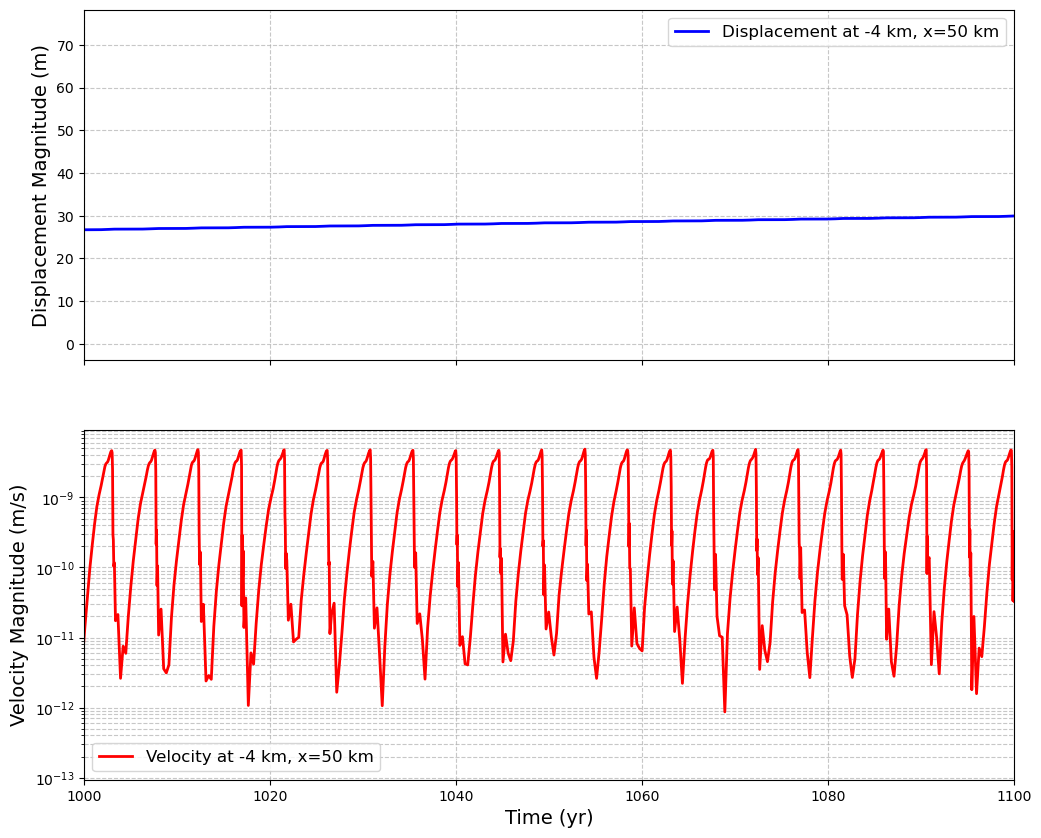

In [ ]:

# Define the time window for zooming (in years)
start_time = 2953.335  # Example: Start zoom at 2953.335 years
end_time = 2953.338    # Example: End zoom at 2953.338 years

# Create a figure with two subplots (panels)
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot displacement magnitudes (linear scale)
axes[0].plot(times, disp_4km_mag, label='Displacement at -4 km, x=50 km', color='b', linestyle='-', linewidth=2)
axes[0].set_ylabel('Displacement Magnitude (m)', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

# axes[0].axvspan(start_time, end_time, color='gray', alpha=0.3, label='Zoomed Region')  # Highlight zoom window

# # Create an inset zoomed plot for displacement
# axins_disp = inset_axes(axes[0], width="45%", height="45%", loc="upper right")
# axins_disp.plot(times, disp_4km_mag, color='b', linestyle='-', linewidth=2)
# axins_disp.set_xlim(start_time, end_time)  # Zoomed x-axis range
# axins_disp.set_title("Zoomed View", fontsize=12)
# axins_disp.grid(True, linestyle='--', alpha=0.7, which='both')
# axins_disp.set_ylim(85, 86.5)  # **Fixed y-axis range**
# # Draw a connection between the main plot and the zoomed inset
# mark_inset(axes[0], axins_disp, loc1=2, loc2=4, fc="none", ec="black", lw=1)

# Plot velocity magnitudes (logarithmic scale)
axes[1].plot(times, vel_4km_mag, label='Velocity at -4 km, x=50 km', color='r', linestyle='-', linewidth=2)
axes[1].set_yscale('log')  # Set logarithmic scale for velocity
axes[1].set_xlabel('Time (yr)', fontsize=14)
axes[1].set_ylabel('Velocity Magnitude (m/s)', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7, which='both')
# axes[1].set_ylim(6e-10, 1.1e-9)  # **Fixed y-axis range**
# axes[1].set_xlim(1000, 1100)  # **Fixed y-axis range**
# axes[1].set_ylim(1e-14, 1e-0)  # **Fixed y-axis range**
# axes[1].axvspan(start_time-10, end_time+10, color='yellow', label='Zoomed Region')  # Highlight zoom window

# # Create an inset zoomed plot for velocity
# axins_vel = inset_axes(axes[1], width="45%", height="45%", loc="upper right")
# axins_vel.plot(times, vel_4km_mag, color='r', linestyle='-', linewidth=2)
# axins_vel.set_yscale('log')  # Keep log scale for velocity
# axins_vel.set_xlim(start_time, end_time)  # Zoomed x-axis range
# axins_vel.set_title("Zoomed View", fontsize=12)
# axins_vel.grid(True, linestyle='--', alpha=0.7, which='both')

# # Draw a connection between the main plot and the zoomed inset
# mark_inset(axes[1], axins_vel, loc1=2, loc2=4, fc="none", ec="black", lw=1)

# # Improve aesthetics
# for ax in axes:
#     ax.tick_params(axis='both', labelsize=12)
#     ax.spines['top'].set_linewidth(2.5)
#     ax.spines['right'].set_linewidth(2.5)
#     ax.spines['left'].set_linewidth(2.5)
#     ax.spines['bottom'].set_linewidth(2.5)

# plt.tight_layout()
# plt.show()
